In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned_data.csv", index_col=0)
df.head()

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Abraham Verghese,2010,4.6,4866,Cutting for Stone,11.0,Fiction
1,Abraham Verghese,2011,4.6,4866,Cutting for Stone,11.0,Fiction
2,Adam Gasiewski,2017,4.4,3113,Milk and Vine: Inspirational Quotes From Class...,6.0,Non Fiction
3,Adam Mansbach,2011,4.8,9568,Go the F**k to Sleep,9.0,Fiction
4,Adir Levy,2019,4.8,8170,What Should Danny Do? (The Power to Choose Ser...,13.0,Fiction


<Axes: xlabel='Price', ylabel='Count'>

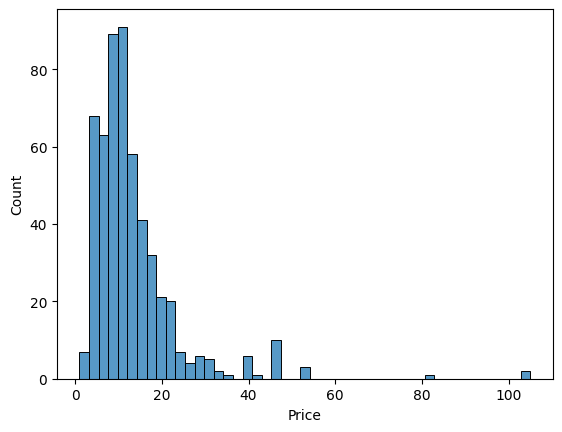

In [3]:
# Wie sind eigentlich die Preise verteilt

sns.histplot(df, x="Price")

In [ ]:
# Wie sind die Autoren verteilt?
# Welche Autoren tauchen am häufigsten auf?
# Wie haben sich die Buchpreise über die Jahre entwickelt?
# Welche Bücher tauchen am häufigsten auf?
# Welches Genre ist beliebter? War das schon immer so?
# Wie sid die Reviews verteilt?
# Gibt es einen Zusammenhang zwischen Anzahl an Reviews und der Häufigkeit der Bücher in den Top 50
# Wie sind die User Ratings verteilt?
# Gibt es einen Zusammenhang zwischen Preis und Anzahl der Reviews?
# Gibt es einen Zusammenhang zwischen User Rating und Reviews